In [ ]:
# 安装第三方库
!pip install transformers datasets

In [2]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
%matplotlib inline


tokenizer_gpt2 = AutoTokenizer.from_pretrained('gpt2')

In [3]:
# 分词效果示例，三段文本表示的意思是相近的
text_fr = '''Évariste Galois (/ɡælˈwɑː/; français : [evaʁist ɡalwa] ; 25 octobre 1811 - 31 mai 1832) était un mathématicien français et un militant politique. Alors qu'il était encore adolescent, il parvint à déterminer une condition nécessaire et suffisante pour qu'un polynôme soit résoluble par des radicaux, résolvant ainsi un problème qui était resté ouvert pendant 350 ans. Son travail posa les fondements de la théorie de Galois et de la théorie des groupes, deux branches majeures de l'algèbre abstraite. Il était un fervent républicain et fut très impliqué dans les troubles politiques qui entourèrent la Révolution française de 1830. En raison de son activisme politique, il fut arrêté à plusieurs reprises, purgé une peine de plusieurs mois de prison. Pour des raisons restées obscures, peu de temps après sa libération de prison, il se battit en duel et décéda des blessures qu'il subit.'''
text_en = '''Évariste Galois (/ɡælˈwɑː/; French: [evaʁist ɡalwa]; 25 October 1811 – 31 May 1832) was a French mathematician and political activist. While still in his teens, he was able to determine a necessary and sufficient condition for a polynomial to be solvable by radicals, thereby solving a problem that had been open for 350 years. His work laid the foundations for Galois theory and group theory, two major branches of abstract algebra. He was a staunch republican and was heavily involved in the political turmoil that surrounded the French Revolution of 1830. As a result of his political activism, he was arrested repeatedly, serving one jail sentence of several months. For reasons that remain obscure, shortly after his release from prison he fought in a duel and died of the wounds he suffered.'''
text_zh = '''埃瓦里斯特·伽罗瓦（法语：Évariste Galois，1811年10月25日—1832年5月31日，法语发音： [evaʁist ɡalwa]）是一位法国数学家和政治活动家。尽管还在十几岁时，他就能够确定多项式能够通过根式求解的充分必要条件，从而解决了一个悬而未决的问题，该问题已经存在了350年。他的工作奠定了Galois理论和群论的基础，这两个是抽象代数的重要分支。他是一位坚定的共和派，深度参与了1830年法国大革命期间的政治动荡。由于他的政治活动，他多次被逮捕，其中一次入狱数月。由于原因不明，他在刑满释放后不久，参与了一场决斗并因受伤而去世。'''

texts = {
    'fr': text_fr,
    'en': text_en,
    'zh': text_zh
}

In [4]:
def get_token_stats(tokenizer):
    # 统计文本中的单词数量（如果是中文，则为文本的字数）
    str_stats = {}
    # 统计分词后的词元数量
    token_stats = {}
    for (k, v) in texts.items():
        text_len = len(v.split()) if k != 'zh' else len(list(v))
        token_len = len(tokenizer.encode(v))
        str_stats[k] = text_len
        token_stats[k] = token_len
    print(str_stats)
    print(token_stats)
    return draw_bar(str_stats, token_stats)
        
def draw_bar(str_stats, token_stats):
    # 将统计结果可视化
    fig = plt.figure(figsize=(6, 6), dpi=80)
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.size': 13})
    bar_width = 0.1
    base = range(len(str_stats))
    br_str = [x - bar_width for x in base]
    br_token = [x + bar_width for x in base]
    plt.bar(br_str, str_stats.values(), color ='g',
            width = bar_width * 2, label ='文本长度')
    plt.bar(br_token, token_stats.values(), color ='b',
            width = bar_width * 2, label ='分词后的长度')
    plt.xticks([r for r in base], str_stats.keys(), fontsize=18)
    plt.legend(shadow=True)
    return fig

{'fr': 142, 'en': 132, 'zh': 278}
{'fr': 307, 'en': 176, 'zh': 497}


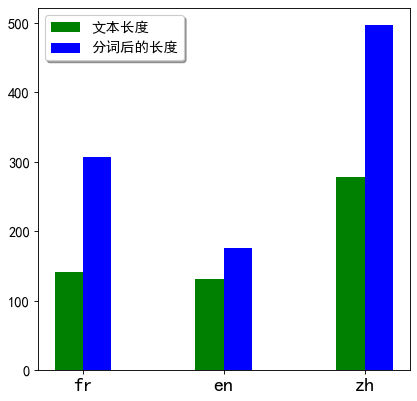

In [5]:
# 使用gpt2分词器进行分词的效果
f = get_token_stats(tokenizer_gpt2)
f.savefig('gpt2_tokenizer.png', dpi=200)

In [6]:
# 英文分词效果展示
'_'.join([tokenizer_gpt2.decode(i) for i in tokenizer_gpt2.encode(text_en)])

'É_var_iste_ Gal_ois_ (/_�_�_æ_l_ˈ_w_�_�_�_�_/_;_ French_:_ [_eva_�_�_ist_ _�_�_al_wa_];_ 25_ October_ 18_11_ –_ 31_ May_ 18_32_)_ was_ a_ French_ mathematician_ and_ political_ activist_._ While_ still_ in_ his_ teens_,_ he_ was_ able_ to_ determine_ a_ necessary_ and_ sufficient_ condition_ for_ a_ po_lyn_omial_ to_ be_ sol_vable_ by_ radicals_,_ thereby_ solving_ a_ problem_ that_ had_ been_ open_ for_ 350_ years_._ His_ work_ laid_ the_ foundations_ for_ Gal_ois_ theory_ and_ group_ theory_,_ two_ major_ branches_ of_ abstract_ algebra_._ He_ was_ a_ staunch_ republican_ and_ was_ heavily_ involved_ in_ the_ political_ turmoil_ that_ surrounded_ the_ French_ Revolution_ of_ 1830_._ As_ a_ result_ of_ his_ political_ activism_,_ he_ was_ arrested_ repeatedly_,_ serving_ one_ jail_ sentence_ of_ several_ months_._ For_ reasons_ that_ remain_ obscure_,_ shortly_ after_ his_ release_ from_ prison_ he_ fought_ in_ a_ duel_ and_ died_ of_ the_ wounds_ he_ suffered_.'

In [7]:
# 法语分词效果展示
'_'.join([tokenizer_gpt2.decode(i) for i in tokenizer_gpt2.encode(text_fr)])

"É_var_iste_ Gal_ois_ (/_�_�_æ_l_ˈ_w_�_�_�_�_/_;_ fr_an_ç_ais_ :_ [_eva_�_�_ist_ _�_�_al_wa_]_ ;_ 25_ oct_ob_re_ 18_11_ -_ 31_ m_ai_ 18_32_)_ _ét_ait_ un_ math_é_matic_ien_ fr_an_ç_ais_ et_ un_ militant_ polit_ique_._ Al_ors_ qu_'_il_ _ét_ait_ enc_ore_ adolescent_,_ il_ par_v_int_ à_ dé_termin_er_ une_ condition_ n_é_cess_aire_ et_ suff_is_ante_ pour_ qu_'_un_ po_lyn_ô_me_ so_it_ r_és_ol_uble_ par_ des_ rad_ic_aux_,_ r_és_ol_vant_ a_ins_i_ un_ prob_l_è_me_ qui_ _ét_ait_ rest_é_ o_u_vert_ p_endant_ 350_ ans_._ Son_ tra_v_ail_ pos_a_ les_ fond_ements_ de_ la_ th_é_orie_ de_ Gal_ois_ et_ de_ la_ th_é_orie_ des_ group_es_,_ de_ux_ branches_ maj_e_ures_ de_ l_'_alg_è_bre_ ab_stra_ite_._ Il_ _ét_ait_ un_ ferv_ent_ ré_public_ain_ et_ fut_ tr_è_s_ impl_iqu_é_ d_ans_ les_ troubles_ polit_iques_ qui_ ent_our_è_rent_ la_ Ré_v_olution_ fr_an_ça_ise_ de_ 1830_._ En_ ra_ison_ de_ son_ activism_e_ polit_ique_,_ il_ fut_ arr_ê_t_é_ à_ plus_ie_urs_ re_prises_,_ pur_g_é_ une_ pe_ine_ de_ plus_ie_urs_ mo

In [8]:
# 中文分词效果展示
'_'.join([tokenizer_gpt2.decode(i) for i in tokenizer_gpt2.encode(text_zh)])

'�_�_�_�_�_�_�_�_�_�_�_�_·_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_É_var_iste_ Gal_ois_�_�_�_18_11_�_�_10_�_�_25_�_�_—_18_32_�_�_5_�_�_31_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_ [_eva_�_�_ist_ _�_�_al_wa_]_�_�_�_是_一_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_。_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_��_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_一_�_�_�_��_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_350_�_�_。_�_�_的_�_�_作_�_�_�_�_�_�_G_alo_is_�_�_�_�_�_�_�_�_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_是_�_�_�_�_�_�_代_�_�_的_�_�_�_�_�_�_�_�_�_。_�_�_是_一_�_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_18_30_�_�_�_�_�_�_大_�_�_�_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_。_�_�_�_�_�_�_的_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_中_一_�_�_�_�_�_�_�_�_�_�_�_。_�_�_�_�_�_�_�_�_不_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_�_不_�_�_�_�_�_�_�_�_�_�_�_一_�_�_�_�_�_�_�_

In [9]:
from datasets import load_dataset

# 使用中文语料训练分词器
raw_data = load_dataset('BelleGroup/train_0.5M_CN')

def get_training_corpus():
    # 为了减少运算时间，只选择较少的训练数据
    data = raw_data['train'].select(range(10000))
    for idx in range(0, len(data), 1000):
        samples = data[idx : idx + 1000]
        yield samples.get('instruction', []) + samples.get('output', [])

In [10]:
# 为了减少运算时间，只将词汇表大小设置为1000，正常应该在5万左右
tokenizer_zh = tokenizer_gpt2.train_new_from_iterator(get_training_corpus(), 1000)

{'fr': 142, 'en': 132, 'zh': 278}
{'fr': 728, 'en': 557, 'zh': 315}


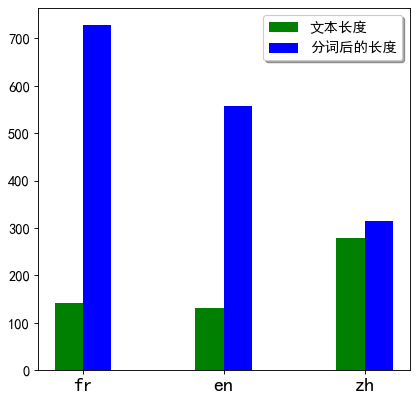

In [11]:
# 展示新分词器的效果
f = get_token_stats(tokenizer_zh)
f.savefig('zh_tokenizer.png', dpi=200)

In [12]:
# 中文分词效果展示
'_'.join([tokenizer_zh.decode(i) for i in tokenizer_zh.encode(text_zh)])

'�_�_�_�_�_里_�_�_特_·_�_�_�_�_�_�_�_（_法_语_：_�_�_v_ar_is_t_e_ _G_al_o_is_，_1_8_1_1_年_1_0_�_�_2_5_日_�_�_1_8_3_2_年_5_�_�_3_1_日_，_法_语_发_音_：_ _[_e_v_a_�_�_is_t_ _�_�_al_w_a_]_）_是一_位_法_国_数_学_家_和_�_�_�_�_活_动_家_。_�_�_管_还_在_�_�_�_�_�_�_�_时_，_他_就_能够_确_定_多_项_式_能够_通过_根_式_求_解_的_�_�_分_�_�_要_�_�_件_，_从_而_解_决_了_一个_�_�_而_未_决_的_问题_，_该_问题_已_经_�_�_在_了_3_5_0_年_。_他_的_工作_�_�_定_了_G_al_o_is_理_论_和_�_�_论_的_基_�_�_，_这_两_个_是_�_�_�_�_代_数_的_重要_分_�_�_。_他_是一_位_�_�_定_的_�_�_和_�_�_，_深_度_�_�_与_了_1_8_3_0_年_法_国_大_�_�_�_�_期_间_的�_�_�_�_�_动_�_�_。_由_于_他_的�_�_�_�_�_活_动_，_他_多_次_被_�_�_�_�_，_其_中_一_次_入_�_�_数_�_�_。_由_于_原_因_不_明_，_他_在_�_�_�_�_�_�_放_后_不_�_�_，_�_�_与_了_一_场_决_�_�_并_因_受_�_�_而_去_�_�_。'